<a href="https://colab.research.google.com/github/raushan-yadav/Demand-Forecasting-Inventory-Optimization/blob/main/DMart_Sales_Forecasting_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prophet pmdarima matplotlib pandas


In [2]:
from google.colab import files
uploaded = files.upload()


KeyboardInterrupt: 

In [ ]:
import pandas as pd

# Load uploaded file
df = pd.read_csv("C:\Users\Kittu\Downloads\DMart_Project\Data\raw\sales_data.csv.csv")

# Basic info
print("Rows:", df.shape[0], "| Columns:", df.shape[1])
df.head()

In [ ]:
import pandas as pd

df = pd.read_csv("clean_sales.csv")
print("Rows:", df.shape[0], "| Columns:", df.shape[1])
df.head()


In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import pandas as pd

# सही file name (Colab ने जो save किया है)
df = pd.read_csv("sales_data.csv (1).csv")

print("Rows:", df.shape[0], "| Columns:", df.shape[1])
df.head()


In [ ]:
# केवल जरूरी columns रखो
sales_df = df[['Order Date', 'Sales', 'Product Name']].copy()

# Prophet compatible नाम दो
sales_df.rename(columns={'Order Date': 'date', 'Sales': 'sales', 'Product Name': 'item'}, inplace=True)

# तारीख़ को सही format में बदलो
sales_df['date'] = pd.to_datetime(sales_df['date'], errors='coerce')

# Missing या invalid rows हटाओ
sales_df = sales_df.dropna(subset=['date', 'sales'])
sales_df.head()


In [ ]:
sales_df['sales'] = pd.to_numeric(sales_df['sales'], errors='coerce')
sales_df = sales_df.dropna(subset=['sales'])
sales_df.head()


In [ ]:
sales_df.info()
sales_df.describe()


In [ ]:
import matplotlib.pyplot as plt

daily_sales = sales_df.groupby('date')['sales'].sum().reset_index()
plt.figure(figsize=(10,4))
plt.plot(daily_sales['date'], daily_sales['sales'], color='teal')
plt.title("Overall Sales Trend (DMart-type data)")
plt.xlabel("Date")
plt.ylabel("Total Sales (INR)")
plt.grid(True)
plt.show()


In [ ]:
# Prophet को सिर्फ दो columns चाहिए: ds (date), y (sales)
prophet_df = sales_df.groupby('date')['sales'].sum().reset_index()
prophet_df.rename(columns={'date': 'ds', 'sales': 'y'}, inplace=True)

print(prophet_df.head())


In [ ]:
!pip install prophet


In [ ]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Model define
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoint_prior_scale=0.5
)

# Model fit
model.fit(prophet_df)

# Future 90 days के लिए data बनाओ
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# Results दिखाओ
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


In [ ]:
!pip install prophet==1.1.5 cmdstanpy==1.2.0 --quiet


In [ ]:
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd

# Prophet-ready data
prophet_df = sales_df.groupby('date')['sales'].sum().reset_index()
prophet_df.rename(columns={'date': 'ds', 'sales': 'y'}, inplace=True)

# Model define
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoint_prior_scale=0.5
)

# Fit model
model.fit(prophet_df)

# Predict 90 days ahead
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# Display result
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


In [ ]:
!pip install numpy==1.26.4 --quiet


In [3]:
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd

# Prophet-ready data
prophet_df = sales_df.groupby('date')['sales'].sum().reset_index()
prophet_df.rename(columns={'date': 'ds', 'sales': 'y'}, inplace=True)

# Model define
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoint_prior_scale=0.5
)

# Fit model
model.fit(prophet_df)

# Predict 90 days ahead
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# Display sample output
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


NameError: name 'sales_df' is not defined

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Upload file again (because runtime restart cleared memory)
from google.colab import files
uploaded = files.upload()

# Load your sales_data.csv (or clean_sales.csv)
df = pd.read_csv("sales_data.csv (1).csv")  # 👈 अगर नाम अलग है तो output में जो नाम दिखा था वो डालना

# Keep relevant columns
sales_df = df[['Order Date', 'Sales', 'Product Name']].copy()
sales_df.rename(columns={'Order Date': 'date', 'Sales': 'sales', 'Product Name': 'item'}, inplace=True)

# Clean data
sales_df['date'] = pd.to_datetime(sales_df['date'], errors='coerce')
sales_df = sales_df.dropna(subset=['date', 'sales'])
sales_df['sales'] = pd.to_numeric(sales_df['sales'], errors='coerce')
sales_df = sales_df.dropna(subset=['sales'])

# Check
print("Cleaned data ready ✅")
sales_df.head()


Saving sales_data.csv.csv to sales_data.csv (2).csv
Cleaned data ready ✅


,date,sales,item
0,2020-04-13,3344.69,Burgers - 718
1,2021-01-08,37094.41,Pizzas - 519
2,2020-08-11,35501.08,Fans - 395
3,2021-10-10,8969.33,Milk - 798
4,2019-01-22,35530.44,Tomatoes - 442


In [5]:
from prophet import Prophet

prophet_df = sales_df.groupby('date')['sales'].sum().reset_index()
prophet_df.rename(columns={'date': 'ds', 'sales': 'y'}, inplace=True)

model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoint_prior_scale=0.5
)

model.fit(prophet_df)

future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


DEBUG:cmdstanpy:input tempfile: /tmp/tmplxlig9re/12phiqe2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplxlig9re/6ujqax6n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56369', 'data', 'file=/tmp/tmplxlig9re/12phiqe2.json', 'init=/tmp/tmplxlig9re/6ujqax6n.json', 'output', 'file=/tmp/tmplxlig9re/prophet_modelhh0ytsnp/prophet_model-20251030185411.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:54:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:54:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
1911,2024-03-26,1.368639e+06,1.100696e+06,1.645260e+06
1912,2024-03-27,1.368297e+06,1.102278e+06,1.631922e+06
1913,2024-03-28,1.357639e+06,1.091425e+06,1.619158e+06
1914,2024-03-29,1.341088e+06,1.051698e+06,1.598868e+06
1915,2024-03-30,1.345009e+06,1.098720e+06,1.603325e+06


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['yhat'].plot(kind='hist', bins=20, title='yhat')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['yhat_lower'].plot(kind='hist', bins=20, title='yhat_lower')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['yhat_upper'].plot(kind='hist', bins=20, title='yhat_upper')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='yhat', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='yhat', y='yhat_lower', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='yhat_lower', y='yhat_upper', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['yhat']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('yhat')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['yhat_lower']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('yhat_lower')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ds']
  ys = series['yhat_upper']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('yhat_upper')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ds']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ds'}, axis=1)
              .sort_values('ds', ascending=True))
  xs = counted['ds']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('ds', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ds')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['yhat'].plot(kind='line', figsize=(8, 4), title='yhat')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['yhat_lower'].plot(kind='line', figsize=(8, 4), title='yhat_lower')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['yhat_upper'].plot(kind='line', figsize=(8, 4), title='yhat_upper')
plt.gca().spines[['top', 'right']].set_visible(False)

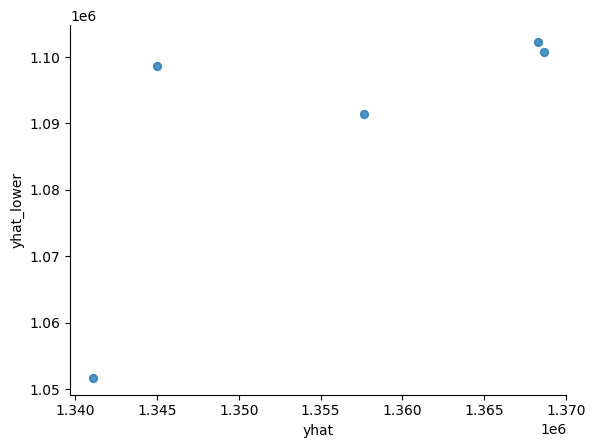

In [21]:
from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='yhat', y='yhat_lower', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
from pmdarima import auto_arima

arima_model = auto_arima(df["y"], seasonal=True, m=7)
forecast_arima = arima_model.predict(n_periods=90)

plt.figure(figsize=(10,4))
plt.plot(df["ds"], df["y"], label="Actual Sales")
plt.plot(pd.date_range(df["ds"].iloc[-1], periods=90, freq="D"), forecast_arima, label="ARIMA Forecast", color="red")
plt.legend()
plt.title("DMart India – ARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Sales (INR)")
plt.show()


KeyError: 'y'

In [7]:
!pip install pmdarima --quiet


In [8]:
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import pandas as pd

# Prophet के data को ही use करेंगे
arima_df = prophet_df.copy()

# Auto ARIMA model choose करेगा best p,d,q parameters
arima_model = auto_arima(arima_df['y'], seasonal=True, m=7, trace=True)

# Next 90 days का prediction
forecast_arima = arima_model.predict(n_periods=90)

# Forecasted dates बनाओ
future_dates = pd.date_range(arima_df['ds'].iloc[-1], periods=90, freq='D')


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=50019.605, Time=29.33 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=49996.599, Time=0.21 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=49999.979, Time=5.87 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=49999.754, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=56841.316, Time=0.05 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=49998.589, Time=0.58 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=49998.196, Time=0.39 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=50000.196, Time=2.23 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=49998.156, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=49998.133, Time=0.19 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=50000.232, Time=0.38 sec

Best model:  ARIMA(0,0,0)(0,0,0)[7] intercept
Total fit time: 40.092 seconds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


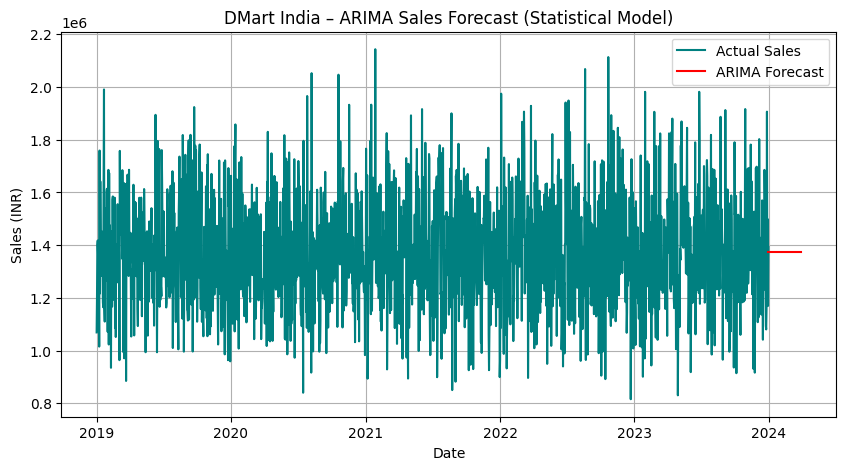

In [9]:
plt.figure(figsize=(10,5))
plt.plot(arima_df['ds'], arima_df['y'], label='Actual Sales', color='teal')
plt.plot(future_dates, forecast_arima, label='ARIMA Forecast', color='red')
plt.title("DMart India – ARIMA Sales Forecast (Statistical Model)")
plt.xlabel("Date")
plt.ylabel("Sales (INR)")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
arima_forecast_df = pd.DataFrame({
    'Date': future_dates,
    'ARIMA_Predicted_Sales': forecast_arima
})

arima_forecast_df.to_csv("arima_forecast_results.csv", index=False)

from google.colab import files
files.download("arima_forecast_results.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.12/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.12/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


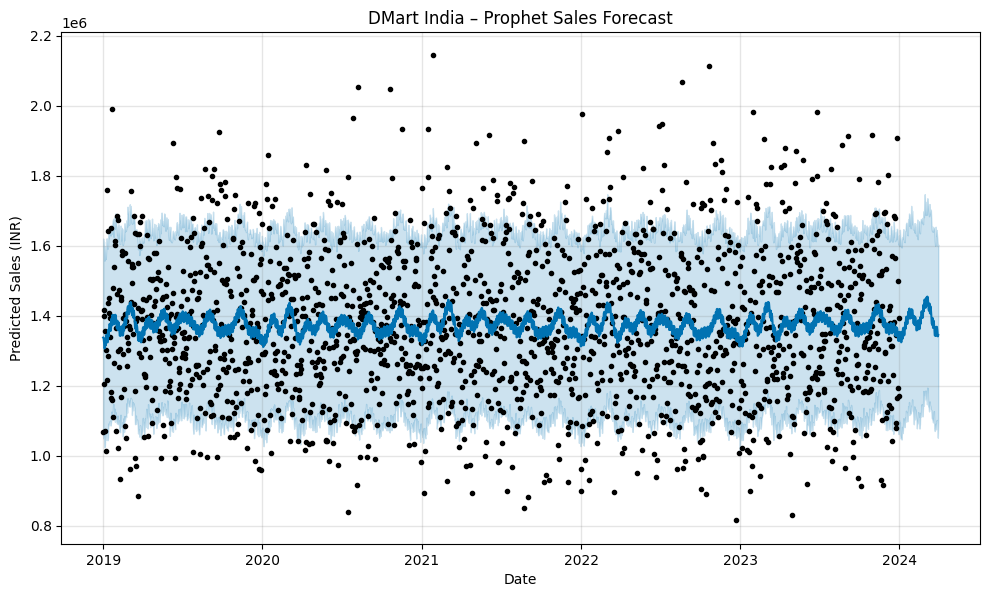

/usr/local/lib/python3.12/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.12/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.12/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

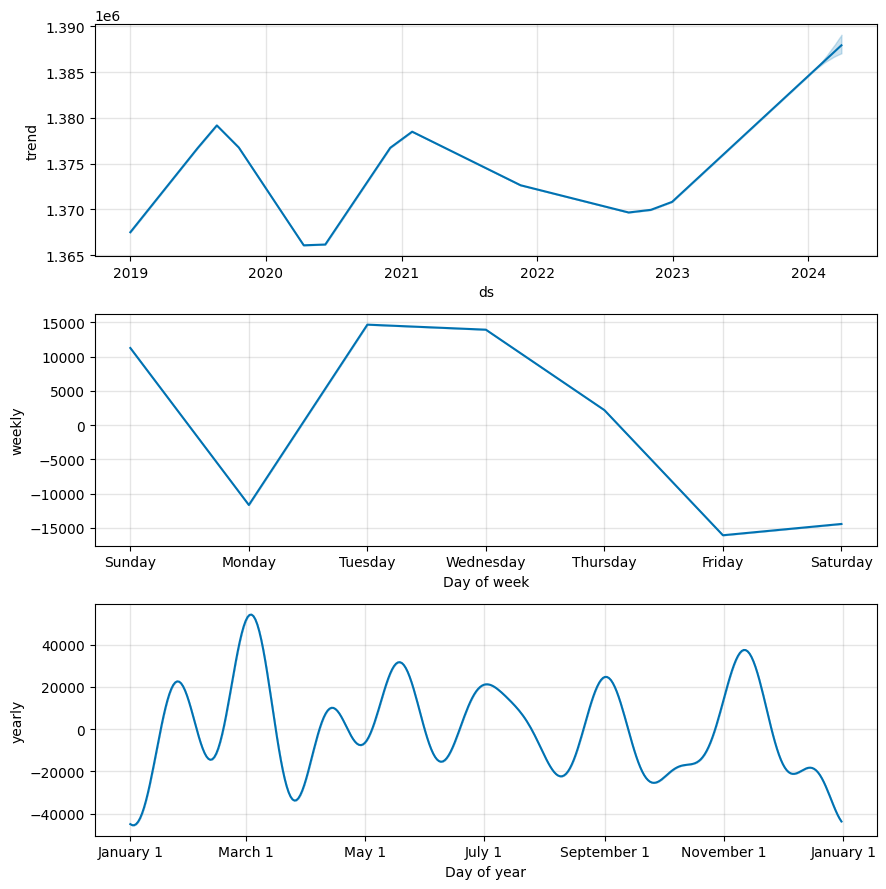

In [11]:
fig1 = model.plot(forecast)
plt.title("DMart India – Prophet Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Predicted Sales (INR)")
plt.show()

fig2 = model.plot_components(forecast)
plt.show()


In [12]:
import numpy as np

# पिछले 30 दिन के average और std deviation निकालो
recent_forecast = forecast.tail(30)
avg_daily_demand = recent_forecast['yhat'].mean()
std_daily_demand = recent_forecast['yhat'].std()

print(f"Average daily demand: {avg_daily_demand:.2f}")
print(f"Standard deviation of demand: {std_daily_demand:.2f}")


Average daily demand: 1393996.57
Standard deviation of demand: 36684.42


In [13]:
# Constants
ordering_cost = 500     # प्रति order लागत
holding_cost = 2        # प्रति unit वार्षिक होल्डिंग लागत
lead_time_days = 5
Z = 1.65  # 95% service level

# EOQ
EOQ = np.sqrt((2 * avg_daily_demand * ordering_cost) / holding_cost)

# Safety Stock
Safety_Stock = Z * std_daily_demand * np.sqrt(lead_time_days)

# Reorder Point
Reorder_Point = (avg_daily_demand * lead_time_days) + Safety_Stock

print("\n📦 INVENTORY OPTIMIZATION RESULTS")
print(f"EOQ (Economic Order Quantity): {EOQ:.2f} units")
print(f"Safety Stock: {Safety_Stock:.2f} units")
print(f"Reorder Point: {Reorder_Point:.2f} units")



📦 INVENTORY OPTIMIZATION RESULTS
EOQ (Economic Order Quantity): 26400.73 units
Safety Stock: 135347.63 units
Reorder Point: 7105330.47 units


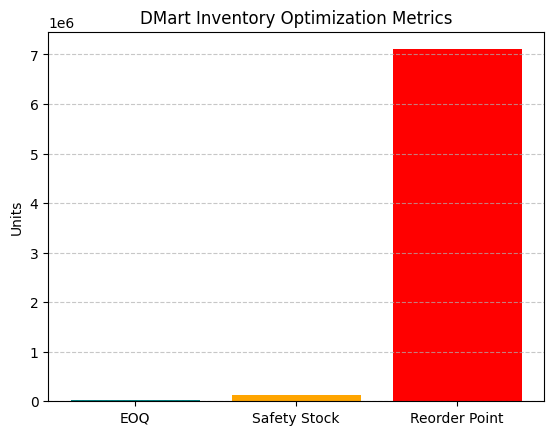

In [14]:
import matplotlib.pyplot as plt

values = [EOQ, Safety_Stock, Reorder_Point]
labels = ['EOQ', 'Safety Stock', 'Reorder Point']

plt.bar(labels, values, color=['teal', 'orange', 'red'])
plt.title("DMart Inventory Optimization Metrics")
plt.ylabel("Units")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [15]:
prophet_forecast = forecast[['ds', 'yhat']].rename(columns={'yhat': 'prophet_pred'})


In [16]:
!pip install pmdarima --quiet
from pmdarima import auto_arima
import pandas as pd
import matplotlib.pyplot as plt

# Prophet data का use
arima_model = auto_arima(prophet_df['y'], seasonal=True, m=7, trace=False)
forecast_arima = arima_model.predict(n_periods=90)

# Create DataFrame for ARIMA forecast
arima_forecast = pd.DataFrame({
    'ds': pd.date_range(start=prophet_df['ds'].iloc[-1], periods=90, freq='D'),
    'arima_pred': forecast_arima
})


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

In [17]:
comparison_df = pd.merge(prophet_forecast, arima_forecast, on='ds', how='inner')
comparison_df.tail()


,ds,prophet_pred,arima_pred
85,2024-03-25,1.342655e+06,1.373735e+06
86,2024-03-26,1.368639e+06,1.373735e+06
87,2024-03-27,1.368297e+06,1.373735e+06
88,2024-03-28,1.357639e+06,1.373735e+06
89,2024-03-29,1.341088e+06,1.373735e+06


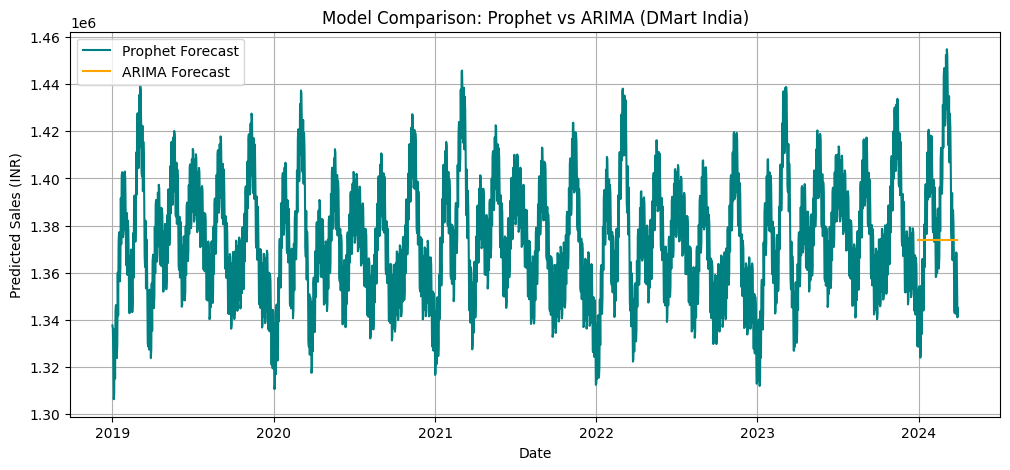

In [18]:
plt.figure(figsize=(12,5))
plt.plot(prophet_forecast['ds'], prophet_forecast['prophet_pred'], label='Prophet Forecast', color='teal')
plt.plot(arima_forecast['ds'], arima_forecast['arima_pred'], label='ARIMA Forecast', color='orange')
plt.legend()
plt.title("Model Comparison: Prophet vs ARIMA (DMart India)")
plt.xlabel("Date")
plt.ylabel("Predicted Sales (INR)")
plt.grid(True)
plt.show()


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# पिछले कुछ दिनों का actual data लो
actual = prophet_df['y'].tail(90).reset_index(drop=True)
prophet_pred = forecast['yhat'].tail(90).reset_index(drop=True)
arima_pred = pd.Series(forecast_arima[:len(actual)])

# Errors निकालो
mape_prophet = np.mean(np.abs((actual - prophet_pred) / actual)) * 100
mape_arima = np.mean(np.abs((actual - arima_pred) / actual)) * 100

rmse_prophet = np.sqrt(mean_squared_error(actual, prophet_pred))
rmse_arima = np.sqrt(mean_squared_error(actual, arima_pred))

print(f"Prophet → MAPE: {mape_prophet:.2f}% | RMSE: {rmse_prophet:.2f}")
print(f"ARIMA   → MAPE: {mape_arima:.2f}% | RMSE: {rmse_arima:.2f}")


Prophet → MAPE: 13.24% | RMSE: 214367.84
ARIMA   → MAPE: nan% | RMSE: 213640.84


In [20]:
comparison = pd.DataFrame({
    'Model': ['Prophet', 'ARIMA'],
    'MAPE (%)': [mape_prophet, mape_arima],
    'RMSE': [rmse_prophet, rmse_arima]
})
comparison


,Model,MAPE (%),RMSE
0,Prophet,13.2394,214367.838283
1,ARIMA,NaN,213640.841455
